In [1]:
#!/bin/env python

from __future__ import absolute_import, division, print_function, unicode_literals

import sys,os,os.path,time
sys.path.append(os.path.expanduser('/global/u1/r/rgupta2/.local/lib/python3.7/site-packages/'))

# export PYTHONPATH="${PYTHONPATH}:/usr/local/lib/python2.7/site-packages:/usr/lib/python2.7/site-packages"


import matplotlib.style
import matplotlib as mpl
mpl.use('Agg')
# mpl.style.use('seaborn')
mpl.rc('image', cmap='gray')
import matplotlib.pyplot as plt
	
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,10)


import time, re, sys, os
from tqdm import tqdm, trange
import PIL.Image
import pandas as pd
import xarray as xr
from glob import glob
import numpy as np
from scipy import stats
from PIL import Image



In [15]:

#  get generated_data for logan one channel

#  31719 counter - > 64 resolution
#  98593 -> 128 resolution
climate_counter = 246718

climate_npy_files = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/stored_outputs/wo_norm_512_logan/result/single_generator_results/generator_{}_images_50_file_*.npy".format(climate_counter)
generated_files = sorted(glob(climate_npy_files))[:]

print("Number of files : {}".format(len(generated_files)))

generated_image_list = []
for file in generated_files:
    my_dict_back = np.load(file, allow_pickle=True)	
    generated_images = my_dict_back.item()["generated_images"]
#     print(generated_images.shape)
    generated_image_list.append(np.squeeze(generated_images))
    
logan_images_one_channel = np.concatenate(generated_image_list, axis=0)




Number of files : 12


In [5]:

#  get generated_data for logan seven channel with normalization

climate_counter = 266718
climate_npy_files = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/stored_outputs/logan_seven_channel_norm/result/single_generator_results/generator_{}_images_50_file_*.npy".format(climate_counter)
generated_files = sorted(glob(climate_npy_files))[:]

print("Number of files : {}".format(len(generated_files)))

generated_image_list = []
for file in generated_files:
    my_dict_back = np.load(file, allow_pickle=True)	
    generated_images = my_dict_back.item()["generated_images"]
#     print(generated_images.shape)
    generated_image_list.append(np.squeeze(generated_images))
    
logan_images_seven_channel = np.concatenate(generated_image_list, axis=0)



Number of files : 1


In [3]:
%time
#  get normalized seven channel images
normalized_original_seven_channel = np.load ( "/project/projectdirs/dasrepo/mustafa/data/climate/sims/normalized/normalized_seven_channels_1998.npy")
np.random.shuffle(normalized_original_seven_channel)


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.58 µs


In [4]:
#  get original images
original_one_channel = np.load ( "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/dataset/climate_data_original/1998.npy")
np.random.shuffle(original_one_channel)


In [6]:
print(logan_images_seven_channel.shape)
print(normalized_original_seven_channel.shape)
print(original_one_channel.shape)

(50, 512, 512, 7)
(2920, 7, 512, 512)
(2056, 1, 512, 512)


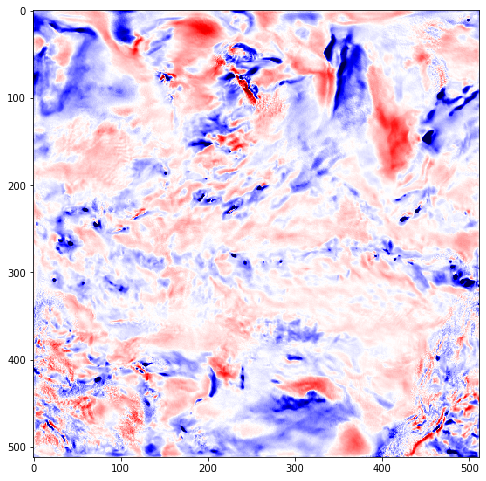

In [16]:





# plotting random sample for logan images one channel


plt.imshow(logan_images_one_channel[3,:,:], cmap='seismic', vmin= -1, vmax=1);


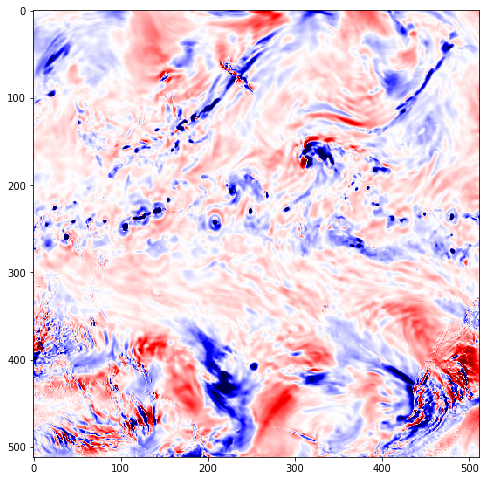

In [17]:
plt.imshow(original_one_channel[3,0,:,:], cmap='seismic', vmin= -1, vmax=1);


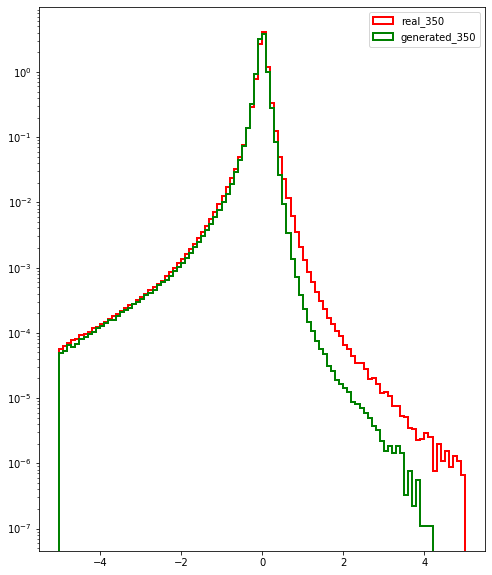

In [20]:
# plotting histograms of one channel output for logan



plt.hist([logan_images_one_channel[:350].flatten(), original_one_channel[:350].flatten()], color=['g', 'r'], bins=100, range=[-5,5], linewidth=2 ,histtype='step', label=["generated_350", "real_350"] , density=True)
# plt.yscale("log")
plt.yscale("log")
plt.legend(loc='best')
# plt.savefig("avgpooling_pdf_plot.png", dpi=200)





12


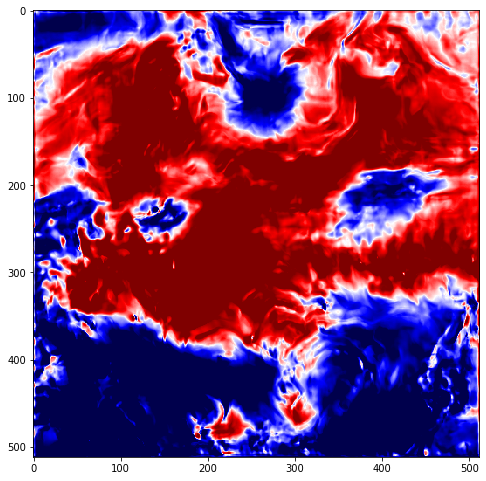

In [33]:
#  to plot samples from logan_images
channel_idx = 3
random_idx = np.random.randint(50)
print(random_idx)
plt.imshow(logan_images_seven_channel[random_idx ,:,:,channel_idx], cmap='seismic', vmin= -1, vmax=1);


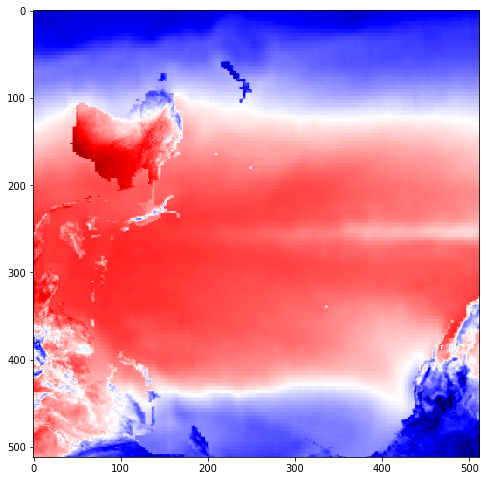

In [34]:
plt.imshow(normalized_original_seven_channel[random_idx,channel_idx, :, :], cmap='seismic', vmin= -1, vmax=1);

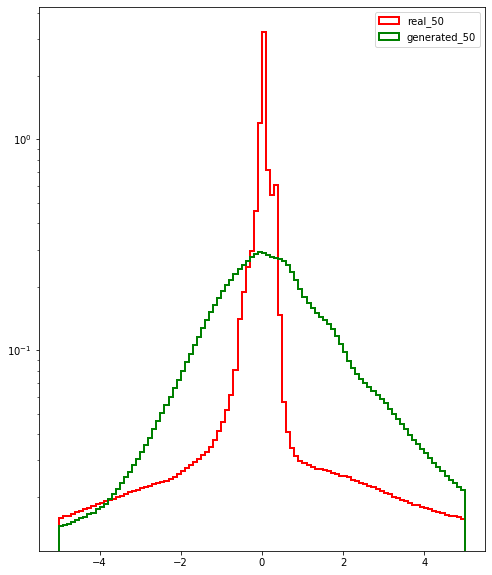

In [36]:


#  now plotting the corresponding histograms


plt.hist([logan_images_seven_channel[:50].flatten(), normalized_original_seven_channel[:50].flatten()], color=['g', 'r'], bins=100, range=[-5,5], linewidth=2 ,histtype='step', label=["generated_50", "real_50"] , density=True)
# plt.yscale("log")
plt.yscale("log")
plt.legend(loc='best')